In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

In [3]:
# Load dataset 
train = pd.read_csv('assets/train.csv')
test = pd.read_csv('assets/test.csv')
sample = pd.read_csv('assets/sampleSubmission.csv')
weather = pd.read_csv('assets/weather.csv')
spray = pd.read_csv('assets/spray.csv')

In [13]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [36]:
def closest_point(point):
    station1, station2 = [41.995, -87.933], [41.786, -87.752]  # Fixed coordinates for two stations
    points = [station1, station2] 
    if cdist([point], points).argmin() == 0: return 1 # return index of closest point
    return 2

In [37]:
# Assign Station to train data based on station coordinates
train['Station'] = [closest_point(x) for x in train[['Latitude','Longitude']].values]

In [39]:
# Merge weather data to train data base on date and station number
train = train.merge(weather, on=['Date','Station'])

In [40]:
train['Station'].value_counts()

2    8245
1    2261
Name: Station, dtype: int64

In [41]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


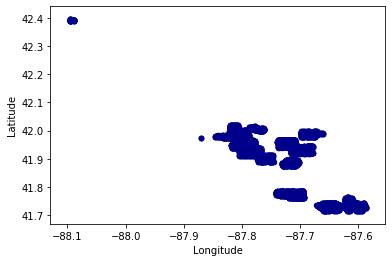

In [70]:
ax1 = spray.plot.scatter(x='Longitude',
                      y='Latitude',
                      c='DarkBlue')

In [71]:
train.head()[['Date','Latitude','Longitude']]

,Date,Latitude,Longitude
0,2007-05-29,41.954690,-87.800991
1,2007-05-29,41.954690,-87.800991
2,2007-05-29,41.994991,-87.769279
3,2007-05-29,41.974089,-87.824812
4,2007-05-29,41.974089,-87.824812


In [80]:
len(cdist([[41.954690, -87.800991]], spray[['Latitude','Longitude']].values)[0])

14835

In [74]:
spray[['Latitude','Longitude']].values

array([[ 42.39162333, -88.08916333],
       [ 42.39134833, -88.08916333],
       [ 42.39102167, -88.08915667],
       ...,
       [ 42.00602167, -87.81739167],
       [ 42.00545333, -87.81742333],
       [ 42.004805  , -87.81746   ]])

In [72]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [56]:
train[['Latitude','Longitude']]

,Latitude,Longitude
0,41.954690,-87.800991
1,41.954690,-87.800991
2,41.994991,-87.769279
3,41.974089,-87.824812
4,41.974089,-87.824812
...,...,...
10501,41.951866,-87.725057
10502,41.763733,-87.742302
10503,41.987280,-87.666066
10504,41.912563,-87.668055


In [76]:
train['Station'].value_counts()

2    8245
1    2261
Name: Station, dtype: int64

In [67]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


0        T002
1        T002
2        T007
3        T015
4        T015
         ... 
10501    T228
10502    T035
10503    T231
10504    T232
10505    T235
Name: Trap, Length: 10506, dtype: object

In [16]:
test.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [17]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [20]:
train['Date'] = pd.to_datetime(train['Date'])

In [55]:
train['Species'].value_counts().index

Index(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX TERRITANS', 'CULEX SALINARIUS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'],
      dtype='object')

In [44]:
any([])

False

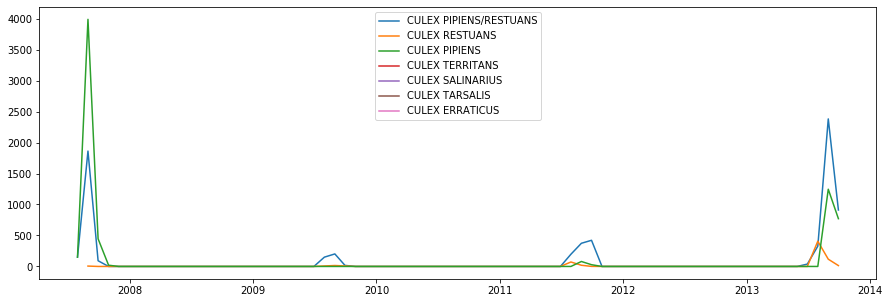

In [60]:
import matplotlib.pyplot as plt

species = train['Species'].value_counts().index
plt.figure(figsize=(15,5))
for s in species:
    plt.plot(train[(train['Species'] == s) & (train['WnvPresent'] == 1)]
             .set_index('Date').resample('M').sum()[['NumMosquitos']])
    plt.legend(species)


In [29]:
train.set_index('Date').resample('M').mean()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,
2007-05-31,36.240000,41.876884,-87.696170,7.920000,1.600000,0.000000
2007-06-30,38.551136,41.887704,-87.716944,8.210227,2.431818,0.000000
2007-07-31,35.434783,41.834128,-87.681384,7.573913,12.520000,0.010435
2007-08-31,34.320488,41.795195,-87.657426,7.309268,19.519512,0.097561
2007-09-30,35.748062,41.811805,-87.669031,7.475452,12.015504,0.036176
...,...,...,...,...,...,...
2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-30,38.153670,41.853246,-87.715481,8.011468,10.805046,0.002294
2013-07-31,39.089623,41.852302,-87.707469,8.058176,20.080189,0.037736


In [4]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
spray['date'] = pd.to_datetime(spray['Date'])

In [12]:
spray['date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: date, dtype: int64

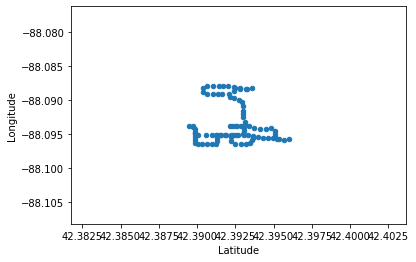

In [31]:
spray[spray['Date'] == '2011-08-29'][['Latitude','Longitude']].plot(kind= 'scatter', x='Latitude',y='Longitude')

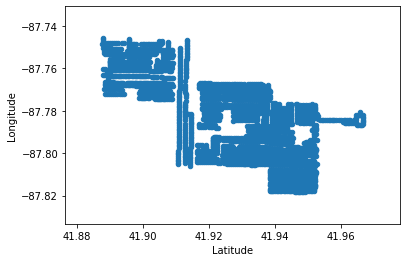

In [33]:
spray[spray['Date'] == '2013-08-15'][['Latitude','Longitude']].plot(kind= 'scatter', x='Latitude',y='Longitude')

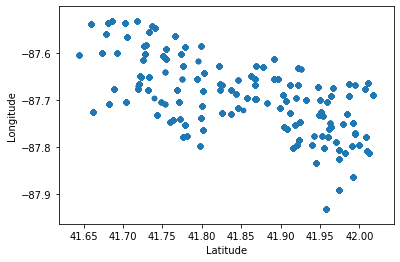

In [37]:
train[['Latitude','Longitude']].plot(kind='scatter', x='Latitude',y='Longitude')